In [1]:
# Í¥å ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù - Part 1: CSV Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî 2020ÎÖÑÎ∂ÄÌÑ∞ 2022ÎÖÑÍπåÏßÄÏùò Í¥å ÎÇ†Ïî® CSV Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

## Î™©Ï∞®
1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌÉêÏÉâ
2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
3. Ïó∞ÎèÑÎ≥Ñ/ÏõîÎ≥Ñ Î∂ÑÏÑù
4. ÏãúÍ∞ÅÌôî
5. Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú


SyntaxError: invalid syntax (1549381718.py, line 3)

In [2]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import sys
import os
sys.path.append('../src')  # src ÎîîÎ†âÌÜ†Î¶¨Î•º Python Í≤ΩÎ°úÏóê Ï∂îÍ∞Ä

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ïö∞Î¶¨Í∞Ä ÎßåÎì† Î™®ÎìàÎì§ import
from data_processing import load_all_csv_files, preprocess_weather_data, get_yearly_summary, get_monthly_summary
from visualization import plot_monthly_temperature_by_year, plot_monthly_precipitation_by_year, plot_yearly_summary, plot_temperature_departure, create_comprehensive_dashboard

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!")


ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!


In [3]:
## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌÉêÏÉâ


In [4]:
# 1.1 CSV ÌååÏùºÎì§ Î°úÎî©
combined_df, csv_files = load_all_csv_files("../data")

print(f"Ï¥ù {len(csv_files)}Í∞úÏùò CSV ÌååÏùºÏùÑ Î°úÎî©ÌñàÏäµÎãàÎã§.")
print(f"Í≤∞Ìï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: {combined_df.shape}")
print("\nÌååÏùº Î™©Î°ù:")
for i, file in enumerate(csv_files, 1):
    print(f"{i:2d}. {file}")

print(f"\nÎç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: {combined_df['Date'].min()} ~ {combined_df['Date'].max()}")
print(f"Ï¥ù {len(combined_df)} ÏùºÏùò Îç∞Ïù¥ÌÑ∞")


Ï¥ù 36Í∞úÏùò CSV ÌååÏùºÏùÑ Î°úÎî©ÌñàÏäµÎãàÎã§.
Í≤∞Ìï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: (1096, 10)

ÌååÏùº Î™©Î°ù:
 1. 2020_01.csv
 2. 2020_02.csv
 3. 2020_03.csv
 4. 2020_04.csv
 5. 2020_05.csv
 6. 2020_06.csv
 7. 2020_07.csv
 8. 2020_08.csv
 9. 2020_09.csv
10. 2020_10.csv
11. 2020_11.csv
12. 2020_12.csv
13. 2021_01.csv
14. 2021_02.csv
15. 2021_03.csv
16. 2021_04.csv
17. 2021_05.csv
18. 2021_06.csv
19. 2021_07.csv
20. 2021_08.csv
21. 2021_09.csv
22. 2021_10.csv
23. 2021_11.csv
24. 2021_12.csv
25. 2022_01.csv
26. 2022_02.csv
27. 2022_03.csv
28. 2022_04.csv
29. 2022_05.csv
30. 2022_06.csv
31. 2022_07.csv
32. 2022_08.csv
33. 2022_09.csv
34. 2022_10.csv
35. 2022_11.csv
36. 2022_12.csv

Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ: 2020-01-01 ~ 2022-12-31
Ï¥ù 1096 ÏùºÏùò Îç∞Ïù¥ÌÑ∞


In [5]:
# 1.2 Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌÉêÏÉâ
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
combined_df.info()

print("\n=== Ï≤´ 5Ìñâ Îç∞Ïù¥ÌÑ∞ ===")
print(combined_df.head())

print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===")
print(combined_df.describe())


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1096 non-null   object 
 1   Maximum        1096 non-null   int64  
 2   Minimum        1096 non-null   int64  
 3   Average        1096 non-null   float64
 4   Departure      1096 non-null   float64
 5   HDD            1096 non-null   int64  
 6   CDD            1096 non-null   int64  
 7   Precipitation  1096 non-null   object 
 8   New Snow       1096 non-null   int64  
 9   Snow Depth     1096 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 85.8+ KB

=== Ï≤´ 5Ìñâ Îç∞Ïù¥ÌÑ∞ ===
         Date  Maximum  Minimum  Average  Departure  HDD  CDD Precipitation  \
0  2020-01-01       86       76     80.5       -0.6    0   16             T   
1  2020-01-02       85       76     80.5       -0.6    0   16          0.03   
2  20

In [7]:
# 1.3 ÌäπÏàò Í∞íÎì§ ÌôïÏù∏
print("=== Precipitation Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í ===")
print(f"Í≥†Ïú†Í∞í: {sorted(combined_df['Precipitation'].unique())}")
print(f"'T' Í∞íÏùò Í∞úÏàò: {sum(combined_df['Precipitation'] == 'T')}")

print("\n=== Snow Depth Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í ===")
print(f"Í≥†Ïú†Í∞í: {sorted(combined_df['Snow Depth'].unique())}")
print(f"'M' Í∞íÏùò Í∞úÏàò: {sum(combined_df['Snow Depth'] == 'M')}")

print("\nÏ∞∏Í≥†:")
print("- 'T' (Trace): Í∞ïÏàòÎüâÏù¥ Ï∏°Ï†ï Í∞ÄÎä•Ìïú ÏµúÏÜåÎüâÎ≥¥Îã§ Ï†ÅÏùåÏùÑ ÏùòÎØ∏")
print("- 'M' (Missing): Í≤∞Ï∏°Í∞íÏùÑ ÏùòÎØ∏")


=== Precipitation Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í ===


TypeError: '<' not supported between instances of 'float' and 'str'

In [8]:
## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ∏∞ Ï†ÑÏóê Îã§Ïùå Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ ÏàòÌñâÌï©ÎãàÎã§:
1. Date Ïª¨ÎüºÏùÑ datetime ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
2. Year, Month, Day Ïª¨Îüº Ï∂îÍ∞Ä
3. PrecipitationÏùò 'T' ‚Üí 0 Î≥ÄÌôò
4. Snow DepthÏùò 'M' ‚Üí 0 Î≥ÄÌôò
5. ÌôîÏî® ‚Üí ÏÑ≠Ïî® Î≥ÄÌôò (Maximum, Minimum, Average)
6. Ïù∏Ïπò ‚Üí mm Î≥ÄÌôò (Precipitation, Snow Depth)


SyntaxError: invalid character '‚Üí' (U+2192) (3660161128.py, line 6)

In [14]:
# 2.1 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ïã§Ìñâ
print("Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï§ë...")
processed_df = preprocess_weather_data(combined_df)

print("Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print(f"Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {processed_df.shape}")

print("\n=== Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===")
processed_df.info()

print("\n=== Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï≤´ 5Ìñâ ===")
print(processed_df.head())


Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!
Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1096, 13)

=== Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1096 non-null   datetime64[ns]
 1   Maximum        1096 non-null   float64       
 2   Minimum        1096 non-null   float64       
 3   Average        1096 non-null   float64       
 4   Departure      1096 non-null   float64       
 5   HDD            1096 non-null   int64         
 6   CDD            1096 non-null   int64         
 7   Precipitation  1096 non-null   float64       
 8   New Snow       1096 non-null   int64         
 9   Snow Depth     1096 non-null   float64       
 10  Year           1096 non-null   int32         
 11  Month          1096 non-null   int32         
 12  Day            1096 non-null   int32         


In [15]:
# 2.2 Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÌôïÏù∏
print("=== Í∏∞Ïò® Î≥ÄÌôò Í≤∞Í≥º (ÌôîÏî® ‚Üí ÏÑ≠Ïî®) ===")
print("ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ (Ï≤´ 5Ìñâ):")
print(processed_df[['Date', 'Maximum', 'Minimum', 'Average']].head())

print(f"\nÌèâÍ∑† Í∏∞Ïò® Î≤îÏúÑ: {processed_df['Average'].min():.1f}¬∞C ~ {processed_df['Average'].max():.1f}¬∞C")
print(f"ÏµúÍ≥† Í∏∞Ïò® Î≤îÏúÑ: {processed_df['Maximum'].min():.1f}¬∞C ~ {processed_df['Maximum'].max():.1f}¬∞C")
print(f"ÏµúÏ†Ä Í∏∞Ïò® Î≤îÏúÑ: {processed_df['Minimum'].min():.1f}¬∞C ~ {processed_df['Minimum'].max():.1f}¬∞C")

print("\n=== Í∞ïÏàòÎüâ Î≥ÄÌôò Í≤∞Í≥º (Ïù∏Ïπò ‚Üí mm) ===")
print(f"Í∞ïÏàòÎüâ Î≤îÏúÑ: {processed_df['Precipitation'].min():.1f}mm ~ {processed_df['Precipitation'].max():.1f}mm")
print(f"ÌèâÍ∑† ÏùºÏùº Í∞ïÏàòÎüâ: {processed_df['Precipitation'].mean():.2f}mm")

# Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º CSVÎ°ú Ï†ÄÏû•
processed_df.to_csv("../results/processed_weather_data.csv", index=False)
print("\nÏ†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º 'results/processed_weather_data.csv'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")


=== Í∏∞Ïò® Î≥ÄÌôò Í≤∞Í≥º (ÌôîÏî® ‚Üí ÏÑ≠Ïî®) ===
ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ (Ï≤´ 5Ìñâ):
        Date    Maximum    Minimum    Average
0 2020-01-01  30.000000  24.444444  26.944444
1 2020-01-02  29.444444  24.444444  26.944444
2 2020-01-03  30.000000  23.888889  26.944444
3 2020-01-04  30.000000  23.888889  26.944444
4 2020-01-05  31.111111  23.888889  27.500000

ÌèâÍ∑† Í∏∞Ïò® Î≤îÏúÑ: 24.2¬∞C ~ 30.3¬∞C
ÏµúÍ≥† Í∏∞Ïò® Î≤îÏúÑ: 16.7¬∞C ~ 33.3¬∞C
ÏµúÏ†Ä Í∏∞Ïò® Î≤îÏúÑ: 21.1¬∞C ~ 27.8¬∞C

=== Í∞ïÏàòÎüâ Î≥ÄÌôò Í≤∞Í≥º (Ïù∏Ïπò ‚Üí mm) ===
Í∞ïÏàòÎüâ Î≤îÏúÑ: 0.0mm ~ 117.6mm
ÌèâÍ∑† ÏùºÏùº Í∞ïÏàòÎüâ: 6.44mm

Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º 'results/processed_weather_data.csv'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


In [16]:
## 3. Ïó∞ÎèÑÎ≥Ñ/ÏõîÎ≥Ñ Î∂ÑÏÑù


In [17]:
# 3.1 Ïó∞ÎèÑÎ≥Ñ ÏöîÏïΩ ÌÜµÍ≥Ñ
yearly_summary = get_yearly_summary(processed_df)
print("=== Ïó∞ÎèÑÎ≥Ñ ÏöîÏïΩ ÌÜµÍ≥Ñ ===")
print(yearly_summary.round(2))

print("\n=== Ïó∞ÎèÑÎ≥Ñ ÌäπÏßï ===")
for _, row in yearly_summary.iterrows():
    year = int(row['Year'])
    avg_temp = row['Average']
    total_precip = row['Precipitation']
    departure = row['Departure']
    
    print(f"\n{year}ÎÖÑ:")
    print(f"  ‚Ä¢ ÌèâÍ∑† Í∏∞Ïò®: {avg_temp:.1f}¬∞C")
    print(f"  ‚Ä¢ Ï¥ù Í∞ïÏàòÎüâ: {total_precip:.0f}mm")
    print(f"  ‚Ä¢ ÌèâÎÖÑ ÎåÄÎπÑ: {departure:+.1f}¬∞C ({'ÌèâÎÖÑÎ≥¥Îã§ ÎÜíÏùå' if departure > 0 else 'ÌèâÎÖÑÎ≥¥Îã§ ÎÇÆÏùå' if departure < 0 else 'ÌèâÎÖÑÍ≥º ÎπÑÏä∑'})")


=== Ïó∞ÎèÑÎ≥Ñ ÏöîÏïΩ ÌÜµÍ≥Ñ ===
   Year  Average  Maximum  Minimum  Precipitation  Departure
0  2020    28.01    30.89    25.13        2266.70       0.42
1  2021    27.78    29.71    24.95        2505.71      -0.01
2  2022    27.35    30.20    24.49        2286.00      -0.76

=== Ïó∞ÎèÑÎ≥Ñ ÌäπÏßï ===

2020ÎÖÑ:
  ‚Ä¢ ÌèâÍ∑† Í∏∞Ïò®: 28.0¬∞C
  ‚Ä¢ Ï¥ù Í∞ïÏàòÎüâ: 2267mm
  ‚Ä¢ ÌèâÎÖÑ ÎåÄÎπÑ: +0.4¬∞C (ÌèâÎÖÑÎ≥¥Îã§ ÎÜíÏùå)

2021ÎÖÑ:
  ‚Ä¢ ÌèâÍ∑† Í∏∞Ïò®: 27.8¬∞C
  ‚Ä¢ Ï¥ù Í∞ïÏàòÎüâ: 2506mm
  ‚Ä¢ ÌèâÎÖÑ ÎåÄÎπÑ: -0.0¬∞C (ÌèâÎÖÑÎ≥¥Îã§ ÎÇÆÏùå)

2022ÎÖÑ:
  ‚Ä¢ ÌèâÍ∑† Í∏∞Ïò®: 27.3¬∞C
  ‚Ä¢ Ï¥ù Í∞ïÏàòÎüâ: 2286mm
  ‚Ä¢ ÌèâÎÖÑ ÎåÄÎπÑ: -0.8¬∞C (ÌèâÎÖÑÎ≥¥Îã§ ÎÇÆÏùå)


In [18]:
# 3.2 ÏõîÎ≥Ñ Î∂ÑÏÑù (Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÌÜµÌï©)
monthly_overall = processed_df.groupby('Month').agg({
    'Average': 'mean',
    'Maximum': 'mean',
    'Minimum': 'mean',
    'Precipitation': 'mean',
    'Departure': 'mean'
}).round(2)

print("=== ÏõîÎ≥Ñ ÌèâÍ∑† (2020-2022ÎÖÑ ÌÜµÌï©) ===")
print(monthly_overall)

# Í∞ÄÏû• Îç•Í≥† Ï∂îÏö¥ Îã¨ Ï∞æÍ∏∞
hottest_month = monthly_overall['Average'].idxmax()
coldest_month = monthly_overall['Average'].idxmin()
wettest_month = monthly_overall['Precipitation'].idxmax()
driest_month = monthly_overall['Precipitation'].idxmin()

month_names = ['', '1Ïõî', '2Ïõî', '3Ïõî', '4Ïõî', '5Ïõî', '6Ïõî', 
               '7Ïõî', '8Ïõî', '9Ïõî', '10Ïõî', '11Ïõî', '12Ïõî']

print(f"\n=== Í∑πÍ∞í Î∂ÑÏÑù ===")
print(f"Í∞ÄÏû• ÎçîÏö¥ Îã¨: {month_names[hottest_month]} ({monthly_overall.loc[hottest_month, 'Average']:.1f}¬∞C)")
print(f"Í∞ÄÏû• Ï∂îÏö¥ Îã¨: {month_names[coldest_month]} ({monthly_overall.loc[coldest_month, 'Average']:.1f}¬∞C)")
print(f"Í∞ÄÏû• ÎπÑÍ∞Ä ÎßéÏùÄ Îã¨: {month_names[wettest_month]} ({monthly_overall.loc[wettest_month, 'Precipitation']:.1f}mm)")
print(f"Í∞ÄÏû• Í±¥Ï°∞Ìïú Îã¨: {month_names[driest_month]} ({monthly_overall.loc[driest_month, 'Precipitation']:.1f}mm)")


=== ÏõîÎ≥Ñ ÌèâÍ∑† (2020-2022ÎÖÑ ÌÜµÌï©) ===
       Average  Maximum  Minimum  Precipitation  Departure
Month                                                     
1        26.87    29.75    24.02           3.54      -0.30
2        27.09    29.97    24.22           1.79       0.25
3        27.65    30.71    24.57           1.70       0.54
4        28.02    31.00    25.03           3.17      -0.04
5        28.30    31.05    25.55           4.82      -0.26
6        28.60    31.53    25.69           3.77       0.05
7        28.20    31.02    25.36           8.39       0.25
8        27.69    30.57    24.80          10.18      -0.02
9        27.82    30.70    24.94           9.65       0.32
10       27.16    29.99    24.33          16.54      -1.20
11       27.79    26.86    25.01           7.33      -0.42
12       27.36    29.99    24.73           5.94      -0.57

=== Í∑πÍ∞í Î∂ÑÏÑù ===
Í∞ÄÏû• ÎçîÏö¥ Îã¨: 6Ïõî (28.6¬∞C)
Í∞ÄÏû• Ï∂îÏö¥ Îã¨: 1Ïõî (26.9¬∞C)
Í∞ÄÏû• ÎπÑÍ∞Ä ÎßéÏùÄ Îã¨: 10Ïõî (16.5mm

In [19]:
## 4. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

Îã§ÏñëÌïú Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Í¥åÏùò ÎÇ†Ïî® Ìå®ÌÑ¥ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌï©ÎãàÎã§.


SyntaxError: invalid syntax (1952036969.py, line 3)

Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∏∞Ïò® Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...


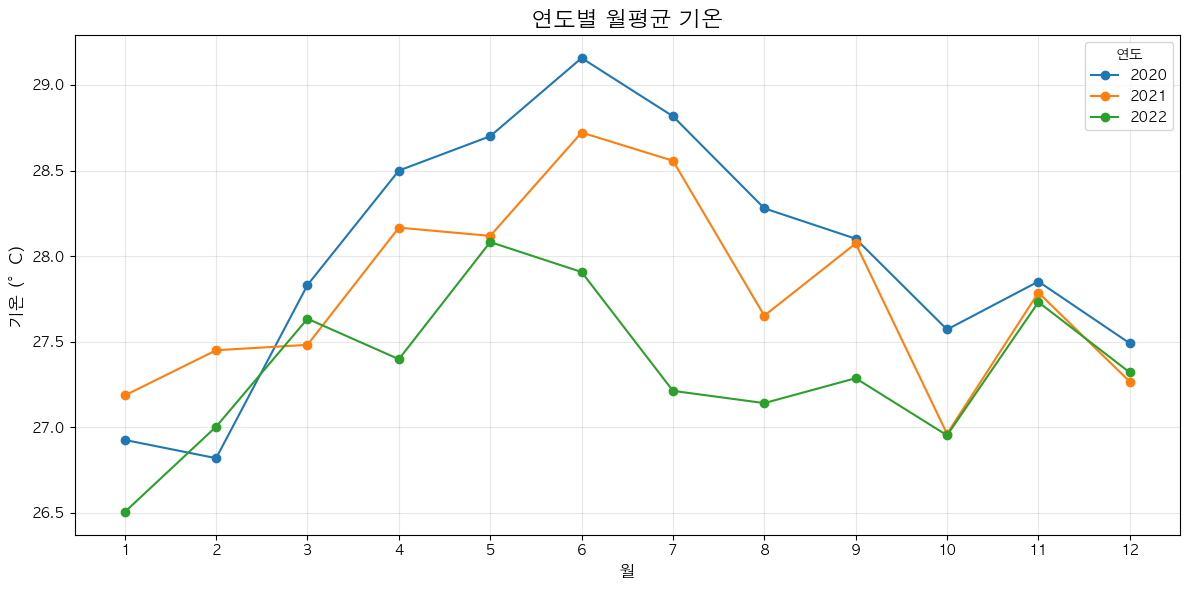

In [20]:
# 4.1 Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∏∞Ïò® Í∑∏ÎûòÌîÑ
print("Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∏∞Ïò® Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...")
plot_monthly_temperature_by_year(processed_df, save_path="../results/monthly_temperature_by_year.png")


Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∞ïÏàòÎüâ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...


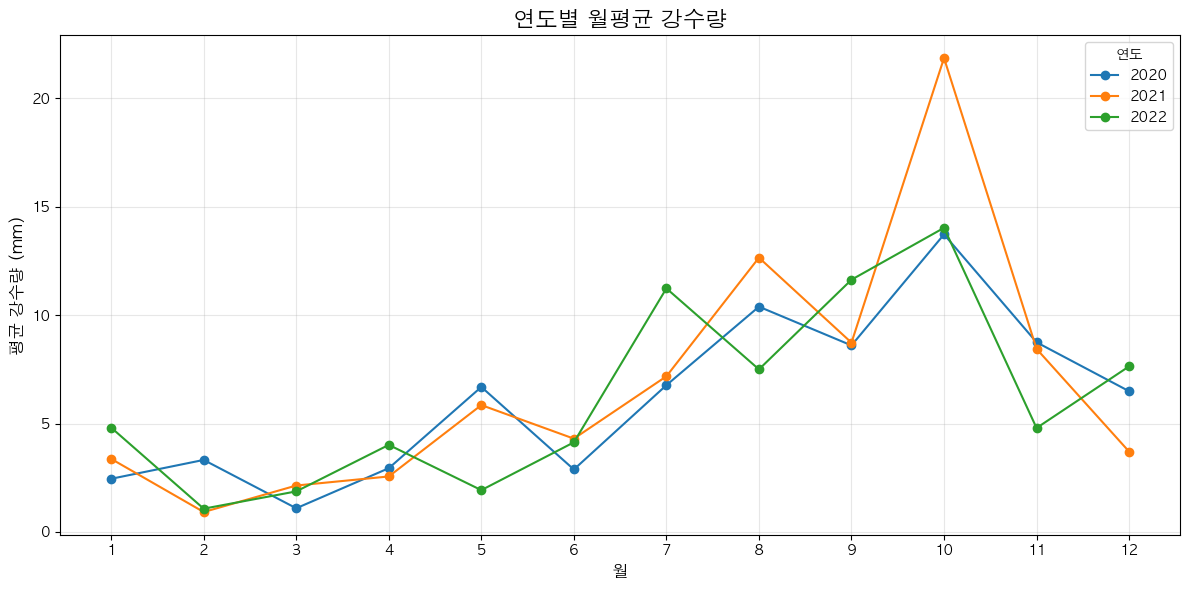

In [21]:
# 4.2 Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∞ïÏàòÎüâ Í∑∏ÎûòÌîÑ
print("Ïó∞ÎèÑÎ≥Ñ ÏõîÌèâÍ∑† Í∞ïÏàòÎüâ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...")
plot_monthly_precipitation_by_year(processed_df, save_path="../results/monthly_precipitation_by_year.png")


Ïó∞Í∞Ñ ÏöîÏïΩ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...


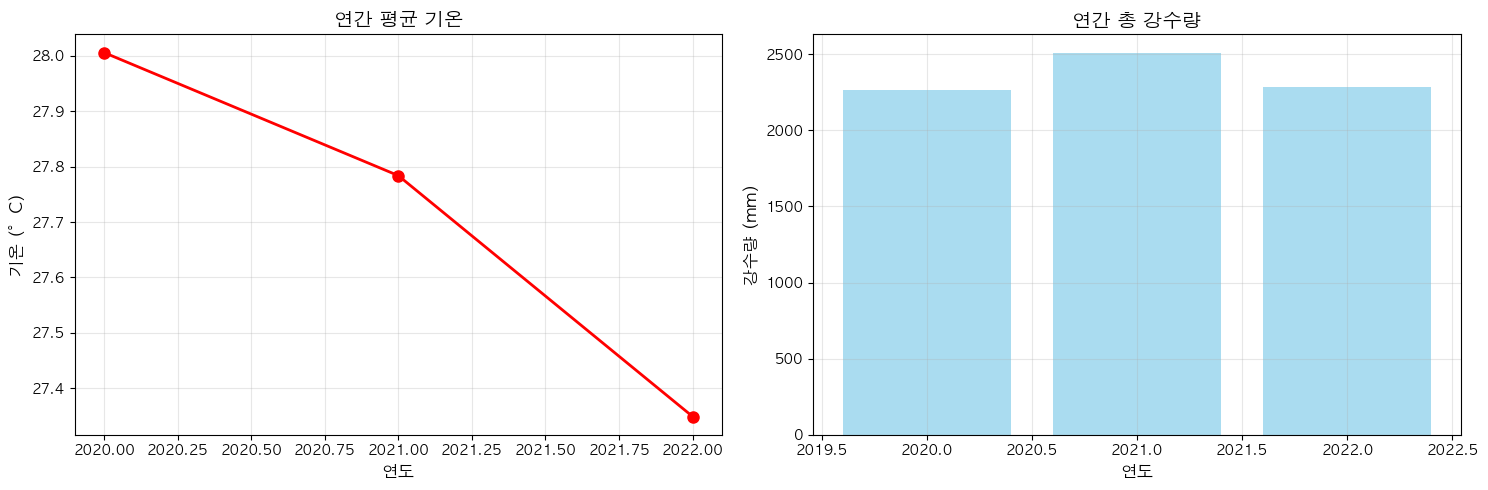

In [22]:
# 4.3 Ïó∞Í∞Ñ ÏöîÏïΩ Í∑∏ÎûòÌîÑ (ÌèâÍ∑† Í∏∞Ïò® & Ï¥ù Í∞ïÏàòÎüâ)
print("Ïó∞Í∞Ñ ÏöîÏïΩ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...")
plot_yearly_summary(processed_df, save_path="../results/yearly_summary.png")


ÏõîÎ≥Ñ Í∏∞Ïò® Ìé∏Ï∞® Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...


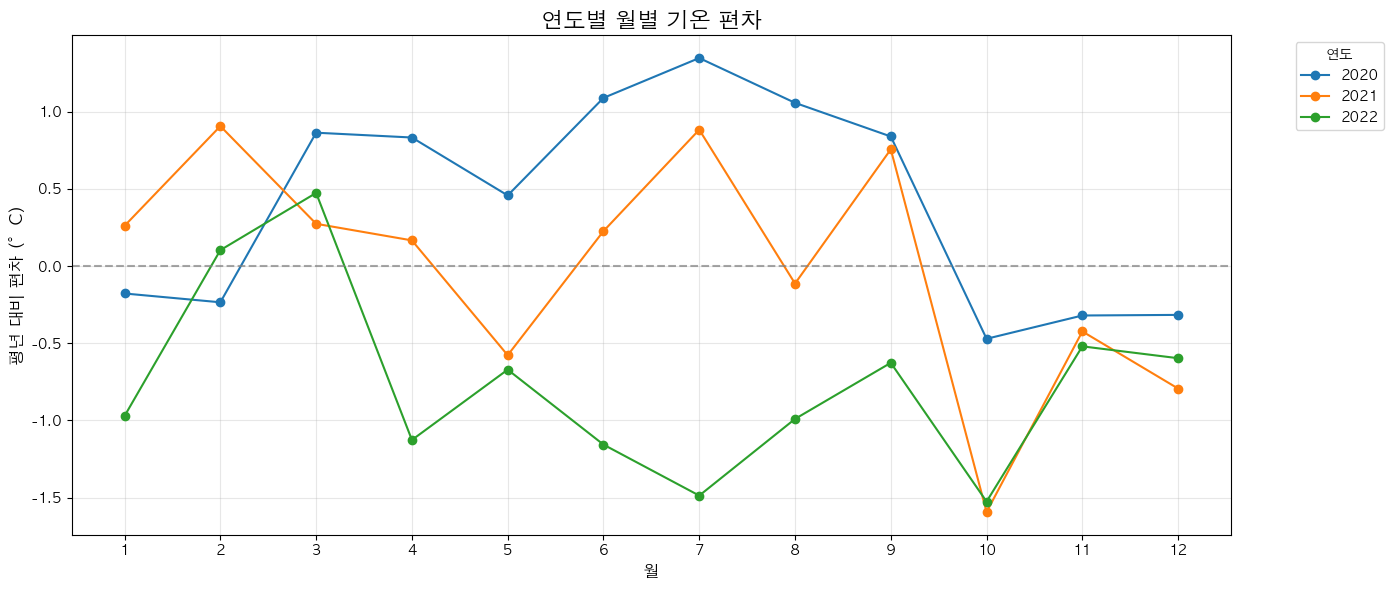

In [23]:
# 4.4 ÏõîÎ≥Ñ Í∏∞Ïò® Ìé∏Ï∞® Í∑∏ÎûòÌîÑ
print("ÏõîÎ≥Ñ Í∏∞Ïò® Ìé∏Ï∞® Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ± Ï§ë...")
plot_temperature_departure(processed_df, save_path="../results/temperature_departure.png")


Ï¢ÖÌï© ÎåÄÏãúÎ≥¥ÎìúÎ•º ÏÉùÏÑ± Ï§ë...


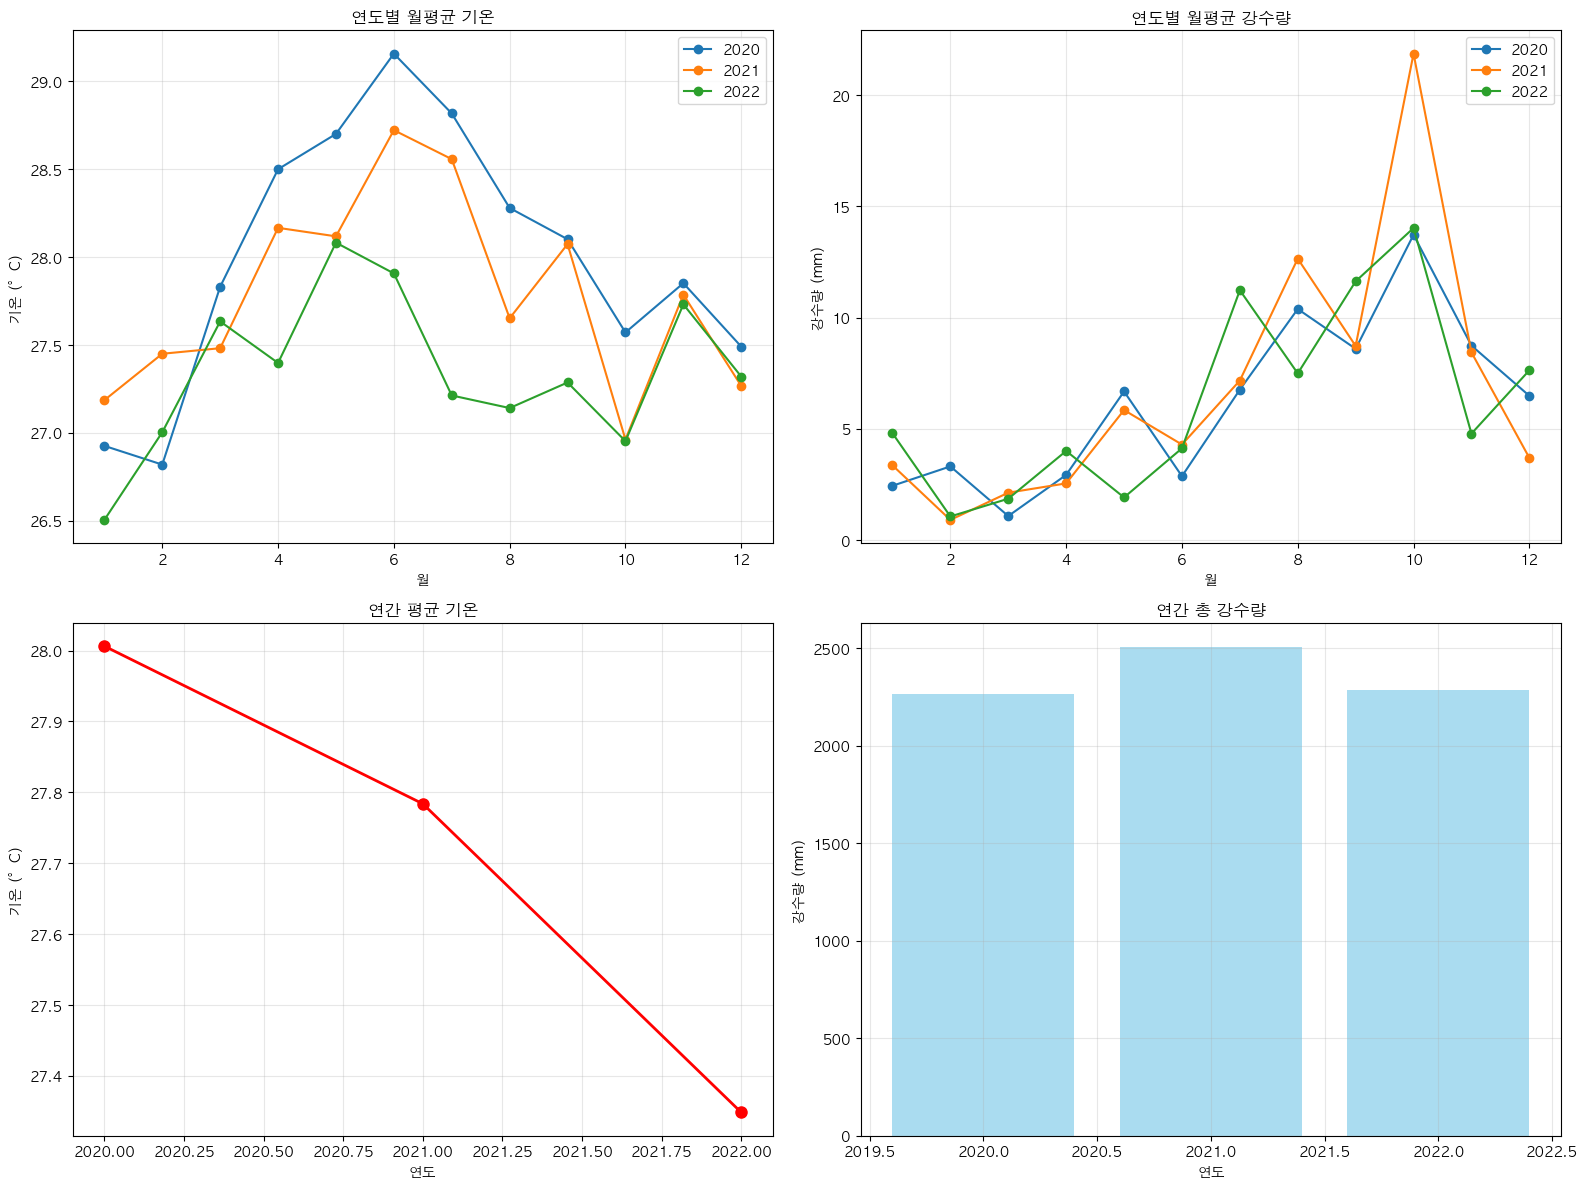

In [25]:
# 4.5 Ï¢ÖÌï© ÎåÄÏãúÎ≥¥Îìú
print("Ï¢ÖÌï© ÎåÄÏãúÎ≥¥ÎìúÎ•º ÏÉùÏÑ± Ï§ë...")
create_comprehensive_dashboard(processed_df, save_path="../results/comprehensive_dashboard.png")


In [26]:
## 5. Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞è Í≤∞Î°†


In [27]:
# 5.1 Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∂ÑÏÑù
print("=== Í¥å ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º (2020-2022) ===\n")

# Í∏∞Ïò® ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
temp_std = processed_df.groupby('Year')['Average'].std()
print("üå°Ô∏è Í∏∞Ïò®Ïùò ÏïàÏ†ïÏÑ±:")
print(f"   Ïó∞ÎèÑÎ≥Ñ ÏùºÌèâÍ∑† Í∏∞Ïò®Ïùò ÌëúÏ§ÄÌé∏Ï∞®: {temp_std.mean():.2f}¬∞C")
print(f"   ‚Üí Í¥åÏùÄ Ïó∞Ï§ë Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏù∏ Í∏∞Ïò®ÏùÑ Ïú†ÏßÄ (Ïó¥ÎåÄ Ìï¥ÏñëÏÑ± Í∏∞ÌõÑ ÌäπÏÑ±)")

# Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù  
summer_months = [6, 7, 8, 9]  # Ïó¨Î¶ÑÏ≤† (Ïö∞Í∏∞)
winter_months = [12, 1, 2, 3]  # Í±¥Í∏∞

summer_avg = processed_df[processed_df['Month'].isin(summer_months)]['Average'].mean()
winter_avg = processed_df[processed_df['Month'].isin(winter_months)]['Average'].mean()
temp_diff = summer_avg - winter_avg

print(f"\nüå¥ Í≥ÑÏ†àÎ≥Ñ ÌäπÏÑ±:")
print(f"   Ïó¨Î¶ÑÏ≤†(6-9Ïõî) ÌèâÍ∑† Í∏∞Ïò®: {summer_avg:.1f}¬∞C")
print(f"   Í±¥Í∏∞(12-3Ïõî) ÌèâÍ∑† Í∏∞Ïò®: {winter_avg:.1f}¬∞C") 
print(f"   Í≥ÑÏ†àÍ∞Ñ Í∏∞Ïò® Ï∞®Ïù¥: {temp_diff:.1f}¬∞C (Îß§Ïö∞ ÏûëÏùå)")

# Í∞ïÏàòÎüâ Î≥ÄÎèôÏÑ± Î∂ÑÏÑù
annual_precip = processed_df.groupby('Year')['Precipitation'].sum()
precip_variation = annual_precip.std() / annual_precip.mean() * 100

print(f"\nüåßÔ∏è Í∞ïÏàòÎüâ ÌäπÏÑ±:")
print(f"   Ïó∞Í∞Ñ Ï¥ù Í∞ïÏàòÎüâ ÌèâÍ∑†: {annual_precip.mean():.0f}mm")
print(f"   Ïó∞Í∞Ñ Í∞ïÏàòÎüâ Î≥ÄÎèôÍ≥ÑÏàò: {precip_variation:.1f}%")
if precip_variation < 20:
    print(f"   ‚Üí ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ Í∞ïÏàò Ìå®ÌÑ¥")
else:
    print(f"   ‚Üí Ïó∞ÎèÑÎ≥Ñ Í∞ïÏàòÎüâ Î≥ÄÎèôÏù¥ ÌÅº")

# Í∑πÍ∞í Î∂ÑÏÑù
extreme_hot = processed_df[processed_df['Maximum'] > processed_df['Maximum'].quantile(0.95)]
extreme_cold = processed_df[processed_df['Minimum'] < processed_df['Minimum'].quantile(0.05)]

print(f"\nüî• Í∑πÍ∞í Î∂ÑÏÑù:")
print(f"   ÏµúÍ≥† Í∏∞Ïò® Í∏∞Î°ù: {processed_df['Maximum'].max():.1f}¬∞C")
print(f"   ÏµúÏ†Ä Í∏∞Ïò® Í∏∞Î°ù: {processed_df['Minimum'].min():.1f}¬∞C")
print(f"   ÏùºÍµêÏ∞® ÌèâÍ∑†: {(processed_df['Maximum'] - processed_df['Minimum']).mean():.1f}¬∞C")

# Í∏∞ÌõÑ Î≥ÄÌôî Ïã†Ìò∏
departure_trend = processed_df.groupby('Year')['Departure'].mean()
print(f"\nüìà Í∏∞ÌõÑ Î≥ÄÌôî Ïã†Ìò∏:")
for year, dept in departure_trend.items():
    trend = "ÏÉÅÏäπ" if dept > 0 else "ÌïòÎùΩ" if dept < 0 else "ÌèâÎÖÑ ÏàòÏ§Ä"
    print(f"   {year}ÎÖÑ ÌèâÎÖÑ ÎåÄÎπÑ: {dept:+.2f}¬∞C ({trend})")

if departure_trend.iloc[-1] > departure_trend.iloc[0]:
    print("   ‚Üí ÏµúÍ∑º ÌèâÎÖÑ ÎåÄÎπÑ Í∏∞Ïò® ÏÉÅÏäπ Í≤ΩÌñ•")
else:
    print("   ‚Üí ÏµúÍ∑º ÌèâÎÖÑ ÎåÄÎπÑ Í∏∞Ïò® ÌïòÎùΩ ÎòêÎäî ÏïàÏ†ï")


=== Í¥å ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º (2020-2022) ===

üå°Ô∏è Í∏∞Ïò®Ïùò ÏïàÏ†ïÏÑ±:
   Ïó∞ÎèÑÎ≥Ñ ÏùºÌèâÍ∑† Í∏∞Ïò®Ïùò ÌëúÏ§ÄÌé∏Ï∞®: 0.91¬∞C
   ‚Üí Í¥åÏùÄ Ïó∞Ï§ë Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏù∏ Í∏∞Ïò®ÏùÑ Ïú†ÏßÄ (Ïó¥ÎåÄ Ìï¥ÏñëÏÑ± Í∏∞ÌõÑ ÌäπÏÑ±)

üå¥ Í≥ÑÏ†àÎ≥Ñ ÌäπÏÑ±:
   Ïó¨Î¶ÑÏ≤†(6-9Ïõî) ÌèâÍ∑† Í∏∞Ïò®: 28.1¬∞C
   Í±¥Í∏∞(12-3Ïõî) ÌèâÍ∑† Í∏∞Ïò®: 27.2¬∞C
   Í≥ÑÏ†àÍ∞Ñ Í∏∞Ïò® Ï∞®Ïù¥: 0.8¬∞C (Îß§Ïö∞ ÏûëÏùå)

üåßÔ∏è Í∞ïÏàòÎüâ ÌäπÏÑ±:
   Ïó∞Í∞Ñ Ï¥ù Í∞ïÏàòÎüâ ÌèâÍ∑†: 2353mm
   Ïó∞Í∞Ñ Í∞ïÏàòÎüâ Î≥ÄÎèôÍ≥ÑÏàò: 5.6%
   ‚Üí ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ Í∞ïÏàò Ìå®ÌÑ¥

üî• Í∑πÍ∞í Î∂ÑÏÑù:
   ÏµúÍ≥† Í∏∞Ïò® Í∏∞Î°ù: 33.3¬∞C
   ÏµúÏ†Ä Í∏∞Ïò® Í∏∞Î°ù: 21.1¬∞C
   ÏùºÍµêÏ∞® ÌèâÍ∑†: 5.4¬∞C

üìà Í∏∞ÌõÑ Î≥ÄÌôî Ïã†Ìò∏:
   2020ÎÖÑ ÌèâÎÖÑ ÎåÄÎπÑ: +0.42¬∞C (ÏÉÅÏäπ)
   2021ÎÖÑ ÌèâÎÖÑ ÎåÄÎπÑ: -0.01¬∞C (ÌïòÎùΩ)
   2022ÎÖÑ ÌèâÎÖÑ ÎåÄÎπÑ: -0.76¬∞C (ÌïòÎùΩ)
   ‚Üí ÏµúÍ∑º ÌèâÎÖÑ ÎåÄÎπÑ Í∏∞Ïò® ÌïòÎùΩ ÎòêÎäî ÏïàÏ†ï
